#**PRODIGY Task 2**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

**Data Loading and Initial Inspection**

Loading the dataset from a CSV file and inspecting its structure for data types and missing values.

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

Displaying the first few rows of the dataset.

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking data types and non-null values for each column.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Identifying any missing values in the dataset.

In [ ]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Feature Selection**

Selecting relevant features ('Annual Income (k$)' and 'Spending Score (1-100)') for clustering analysis.

In [4]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

Displaying the first few rows of the selected features.

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Feature scaling**


In [5]:
Sc = StandardScaler()
X_scaled = Sc.fit_transform(X)

In [ ]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

**K-Means Helper Function: Finding Closest Centroids**

This function calculates the nearest centroid for each data point, assigning cluster memberships.

In [6]:
def find_nearest_centroids(X, centroids):
    K = centroids.shape[0]
    idex = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idex[i] = np.argmin(distance)

    return idex

**K-Means Helper Function: Computing New Centroids**

This function updates the centroids by calculating the mean of the data points assigned to each cluster.


In [7]:
def get_centroids(X, idex, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idex == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

**K-Means Algorithm Execution**

Running the K-Means algorithm for a specified number of iterations to find cluster centroids.

In [23]:
def kMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idex = np.zeros(m)

    for i in range(max_iters):
        idex = find_nearest_centroids(X, centroids)
        centroids = get_centroids(X, idex, K)

    return centroids, idex

**Centroid Initialization for K-Means**

Initializing random centroids to be used in the K-Means clustering process.

In [9]:
def get_kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

**Within-Cluster Sum of Squares (WCSS) Computation**

Calculating the WCSS to evaluate the quality of clustering.

In [10]:
def compute_wcss(X, centroids, idx):
    wcss = 0
    for i in range(X.shape[0]):
        wcss += np.sum((X[i] - centroids[idx[i]]) ** 2)
    return wcss

**Optimal Cluster Number Determination Using the Elbow Method**

Using the elbow method to find the optimal number of clusters for K-Means.

In [24]:
def elbow_method(X, max_K=10):
    wcss_values = []

    for K in range(1, max_K + 1):
        initial_centroids = get_kMeans_init_centroids(X, K)
        centroids, idx = kMeans(X, initial_centroids,10)
        wcss = compute_wcss(X, centroids, idx)
        wcss_values.append(wcss)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_K + 1), wcss_values, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('WCSS')
    plt.show()

**Applying the Elbow Method**

Running the elbow method to determine the optimal number of clusters for the data

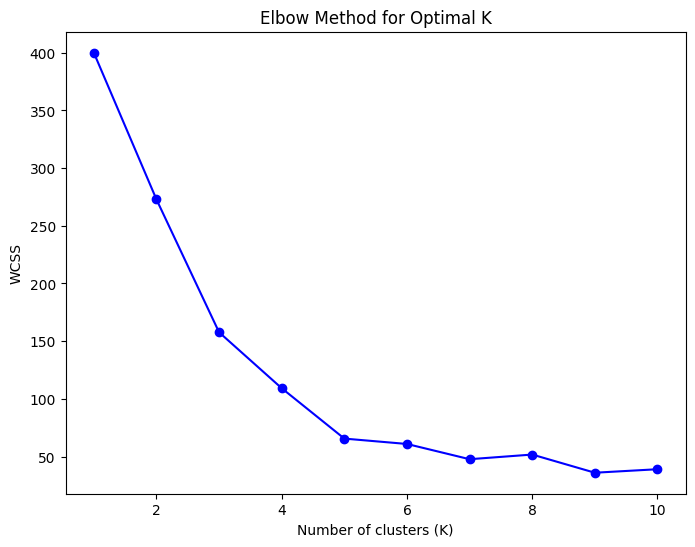

In [ ]:
elbow_method(X_scaled, max_K=10)

**Initializing and Running K-Means Clustering**

Setting up and running the K-Means algorithm with K=5 clusters.

In [26]:
K = 5
initial_centroids = get_kMeans_init_centroids(X_scaled, K)


max_iters = 500
centroids, idx = kMeans(X_scaled, initial_centroids, max_iters)

**Visualization of Clustered Data**

Plotting the clusters along with their centroids.

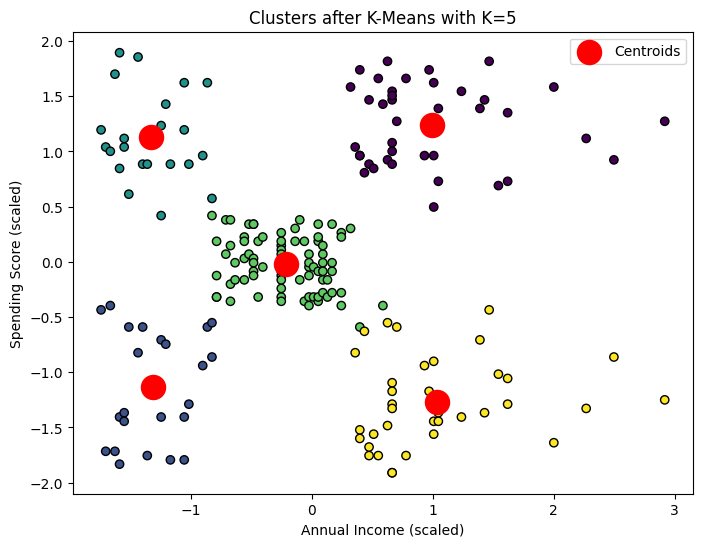

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=idx, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters after K-Means with K=5')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

**3D Clustering with an Additional Feature ('Age')**

Extending the feature set to include 'Age' and standardizing the data.

In [31]:
X_3 = dataset[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

Displaying the first few rows of the new feature set.

In [ ]:
X_3.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


**Feature Scaling**

In [32]:
Sc = StandardScaler()
X_3_scaled = Sc.fit_transform(X_3)

In [ ]:
print(X_3_scaled)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

**Elbow Method for the Extended Feature Set**

Determining the optimal number of clusters for the 3D feature data.

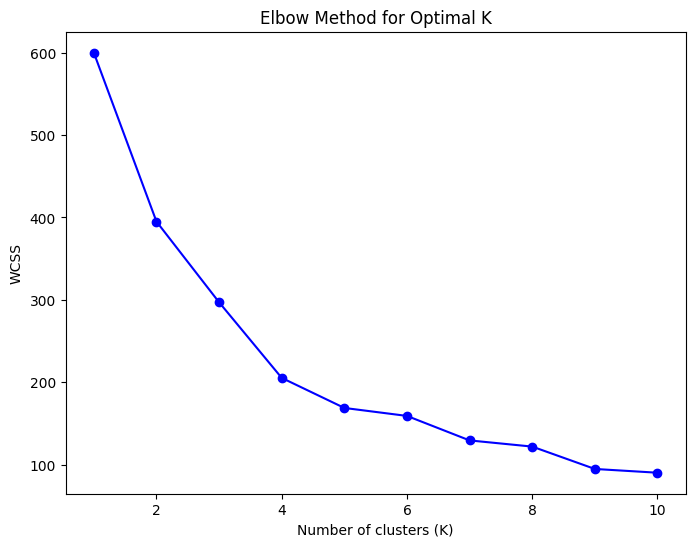

In [ ]:
elbow_method(X_3_scaled, max_K=10)

**Dimensionality Reduction with PCA**

Applying PCA to reduce dimensions for better visualization of clusters.

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_3_scaled)

**Running K-Means on PCA-Reduced Data**

Setting up and running K-Means with K=5 clusters for the PCA-reduced data.

In [34]:
K = 5
initial_centroids = get_kMeans_init_centroids(X_pca, K)

max_iters = 90
centroids, idx = kMeans(X_pca, initial_centroids, max_iters)

**Visualization of Clusters in PCA-Reduced Data**

Plotting the clusters and centroids after dimensionality reduction using PCA.

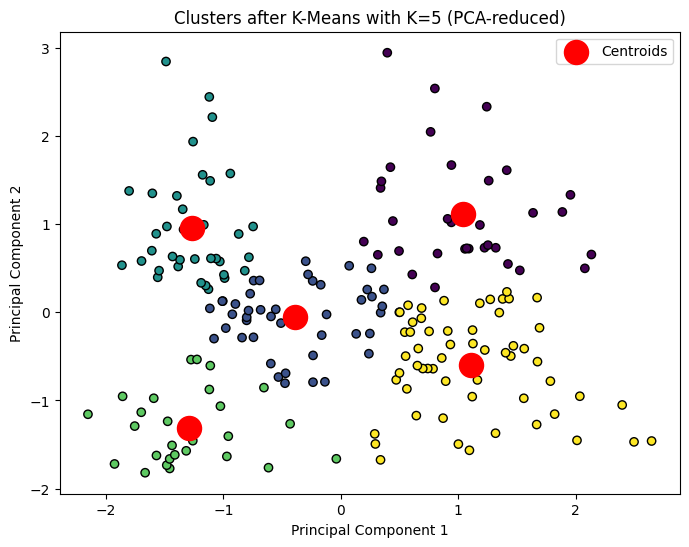

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=idx, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters after K-Means with K=5 (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()